## Machine Learning to predict Heart Disease 

* **Aim** : 
    * To build a machine learning model that can accurately predict if a patient is suffering from a heart disease or             not, based on several health indicators.

* **Data Source** : 
    * Data sourced through Kaggle which contains records of Patients in University of California Irvine's Machine Learning Repository.
    * Link : 
        * https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction/

* **Techniques to be used** : 
    * ML Algorithms for classification problems such as 
        -- Logistic Regression
        -- Decision Tree Classifier
        -- Random Forest
        -- KNN
        -- SVM
* **Expected Results** : 
    * Analysis on the indicators to understand the effect of these indicators on heart health.
    * A Machine Learning classification model that predicts the presence or absence of a heart disease based on heart health indicators.
* **Why is this question important?** : 
    * Cardiovascular diseases have consistently been a leading cause of death worldwide.
    * So, we must put in efforts to reduce heart related diseases and improve the well-being of individuals.
   

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading the dataset
df = pd.read_csv('data/Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


#### Overview of the dataset

In [5]:
df.shape

(270, 14)

In [4]:
# 270 rows, 14 columns

1) age: age in years <br> 
2) sex: sex (1 = male; 0 = female) <br>
3) cp: chest pain type <br>
        -- Value 1: typical angina 
        -- Value 2: atypical angina 
        -- Value 3: non-anginal pain 
        -- Value 4: asymptomatic 
4) trestbps: resting blood pressure (in mm Hg on admission to the hospital) <br>
5) chol: serum cholestoral in mg/dl <br>
6) fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false) <br>
7) restecg: resting electrocardiographic results <br>
        -- Value 0: normal 
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8) thalach: maximum heart rate achieved <br>
9) exang: exercise induced angina (1 = yes; 0 = no) <br>
10) oldpeak = ST depression induced by exercise relative to rest <br>
11) slope: the slope of the peak exercise ST segment <br>
        -- Value 1: upsloping 
        -- Value 2: flat 
        -- Value 3: downsloping 
12) ca: number of major vessels (0-3) colored by flourosopy <br>
13) thal: 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
14) num: diagnosis of heart disease (angiographic disease status) <br>
        -- Value 0: < 50% diameter narrowing 
        -- Value 1: > 50% diameter narrowing 
        (in any major vessel: attributes 59 through 68 are vessels) 











#### Null values

In [7]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [6]:
# no null values found

#### Duplicates

In [9]:
df.duplicated().sum()

0

In [8]:
# no duplicate values found

#### Data type

In [11]:
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [10]:
# all columns are numerical except the target variable

#### Distribution of Target variable

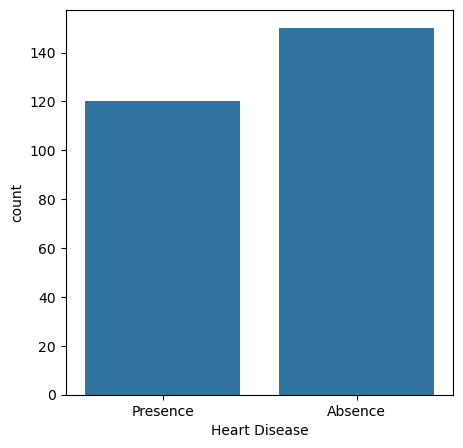

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Heart Disease'])
plt.show()

In [12]:
# The target variable is balanced. There is no significant disparity in the number of instances of each class.

#### Categorical and Continuous columns

In [15]:
print(df.columns)
for i in df.columns:
    print(f'Feature: {i}')
    print(df[i].value_counts())
    print('*'*20)

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')
Feature: Age
Age
54    16
58    15
51    12
57    12
59    12
60    12
52    11
62    11
44    10
41     9
56     9
64     9
65     8
67     8
42     8
53     7
63     7
61     7
46     7
45     7
48     7
43     7
50     7
55     6
66     6
49     5
70     4
47     4
40     3
71     3
39     3
35     3
69     3
68     3
37     2
34     2
76     1
74     1
38     1
77     1
29     1
Name: count, dtype: int64
********************
Feature: Sex
Sex
1    183
0     87
Name: count, dtype: int64
********************
Feature: Chest pain type
Chest pain type
4    129
3     79
2     42
1     20
Name: count, dtype: int64
********************
Feature: BP
BP
120    34
130    31
140    30
110    17
150    17
160    11
125    10
138     9
112     9
128     9


In [14]:
# Age, BP, Cholesterol, Max HR and ST Depression are continuous columns, rest are categorical.

#### Separating continuous and categorical columns

In [17]:
# continuous columns
cont_cols = df.columns[[0,3,4,7,9]]
print(cont_cols)

Index(['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression'], dtype='object')


In [19]:
# categorical columns
cat_cols = df.columns[[1,2,5,6,8,10,11,12]]
print(cat_cols)

Index(['Sex', 'Chest pain type', 'FBS over 120', 'EKG results',
       'Exercise angina', 'Slope of ST', 'Number of vessels fluro',
       'Thallium'],
      dtype='object')


#### Categorical columns analysis

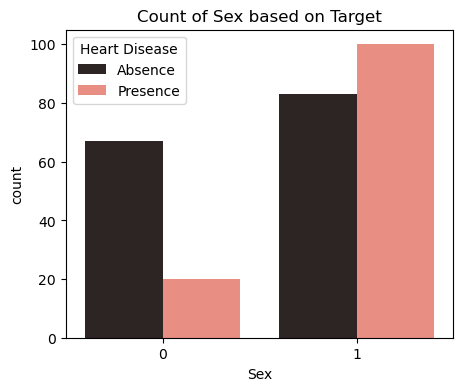

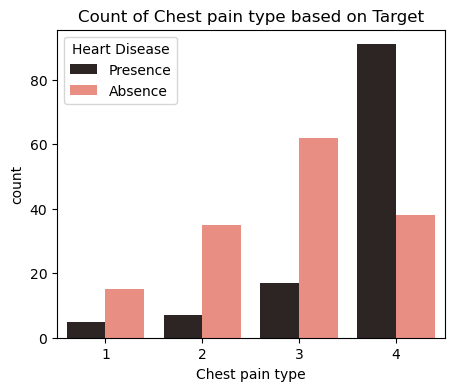

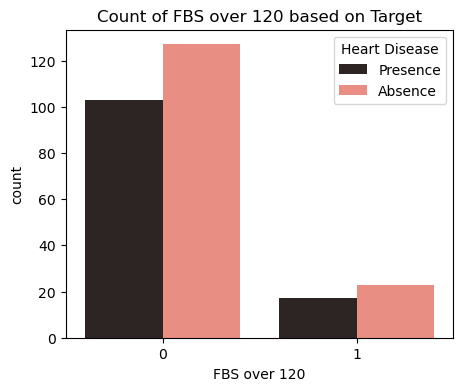

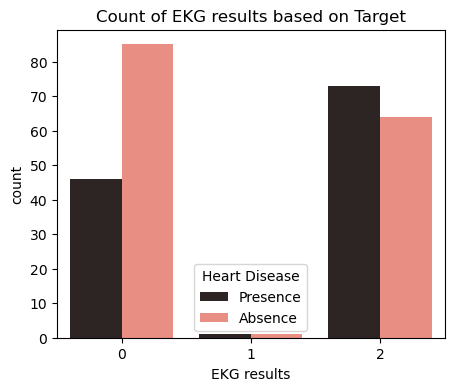

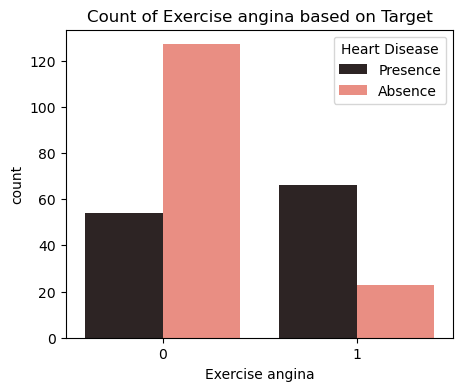

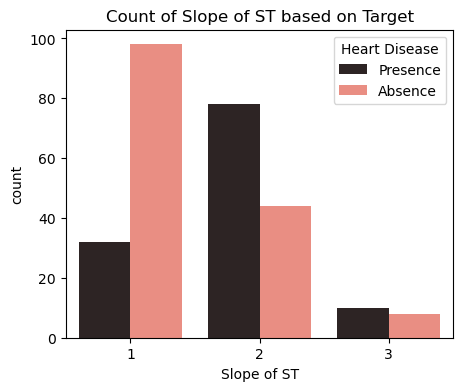

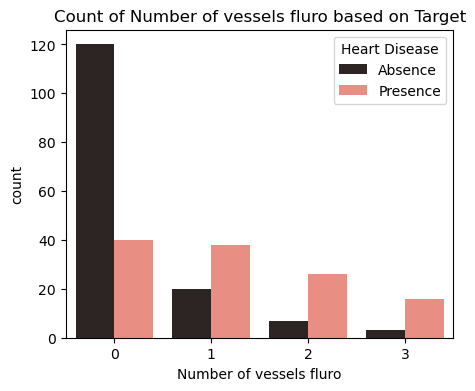

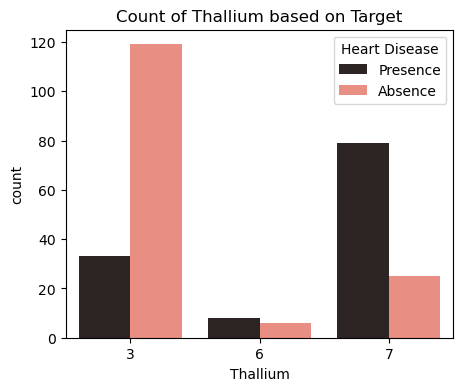

In [21]:
for i in cat_cols:
    plt.figure(figsize=(5,4))
    sns.countplot(x=df[i],hue=df['Heart Disease'], color='salmon')
    plt.title(f'Count of {i} based on Target')
    plt.show()

#### Inference:
* Heart Disease in Male patients is found to be higher than Female patients.
* Patients who are asymptomatic to chest pain have the highest chances of presence of a heart disease.
* Fasting Blood Sugar level greater than 120 does not necessarily signify higher chances of heart disease.
* Patients with probable or definite left ventricular hypertrophy are most likely to have a heart disease.
* Patients who suffer from exercise based angina have higher chances of heart disease compared to patients who do not.
* Patients with 'flat' and 'downsloping' slope of the peak exercise ST segment have higher chances of presence of a heart disease. 
* Patients with 0 coloured vessels have the least chances of presence of a heart disease compared to patients with 1,2 or 3 coloured vessels found during flouroscopy.
* Patients with reversible defect have the highest chance of a heart disease. 

#### Continuous columns analysis

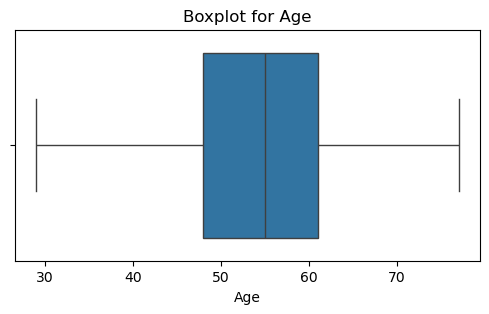

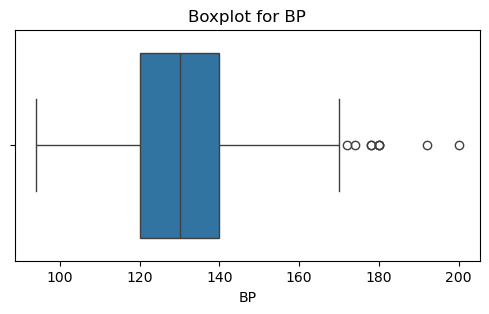

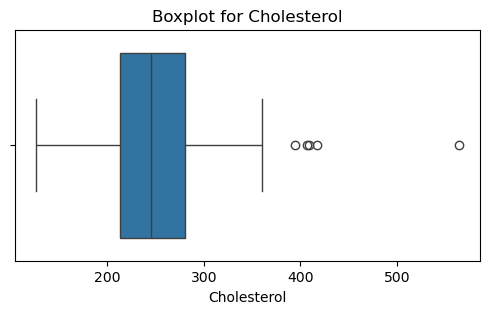

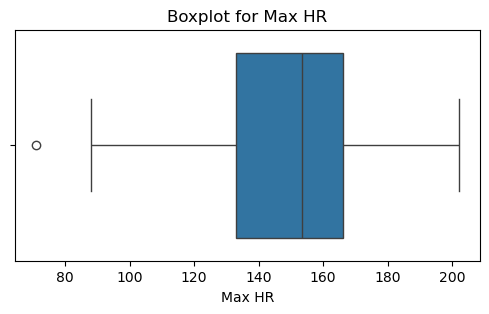

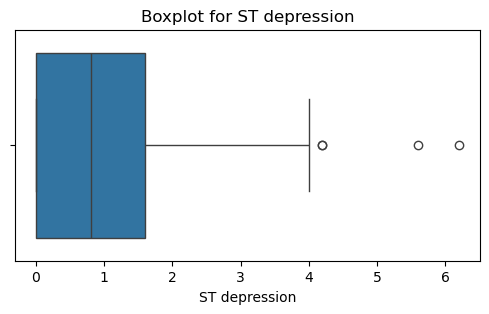

In [23]:
for i in cont_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

Inference : <br>
   * Outliers found in all columns except 'Age'

#### Outlier Treatment

In [25]:
# summary statistics of continuous columns
df[cont_cols].describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,50%,95%,96%,97%,98%,99%,max
Age,270.0,54.433333,9.109067,29.0,34.69,35.76,38.07,39.00,40.0,55.0,68.00,69.000,70.00,70.620,71.93,77.0
BP,270.0,131.344444,17.861608,94.0,100.00,100.38,102.14,105.00,106.9,130.0,160.00,166.200,171.86,178.000,180.00,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,149.00,164.76,168.28,174.76,177.0,245.0,326.55,331.200,340.93,357.720,407.62,564.0
Max HR,270.0,149.677778,23.165717,71.0,95.69,97.76,103.14,105.00,108.0,153.5,182.00,182.480,185.93,187.620,192.62,202.0
ST depression,270.0,1.050000,1.145210,0.0,0.00,0.00,0.00,0.00,0.0,0.8,3.31,3.524,3.60,3.924,4.20,6.2


In [20]:
# Clipping the outliers according to the summary statistics

In [27]:
df['BP'] = df['BP'].clip(upper=df['BP'].quantile(0.96))
df['Cholesterol'] = df['Cholesterol'].clip(upper=df['Cholesterol'].quantile(0.97))
df['Max HR'] = df['Max HR'].clip(lower=df['Max HR'].quantile(0.02))
df['ST depression'] = df['ST depression'].clip(upper=df['ST depression'].quantile(0.97))

In [22]:
# Checking for outliers after clipping

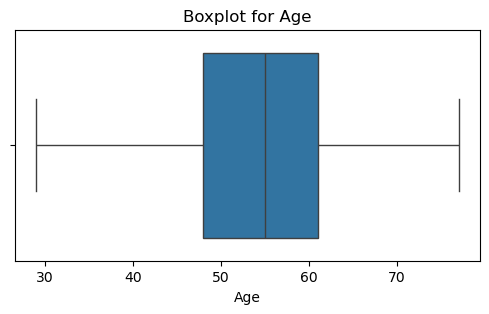

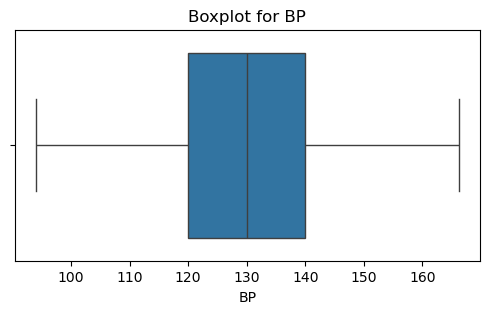

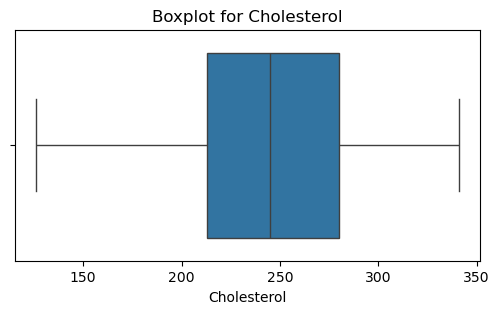

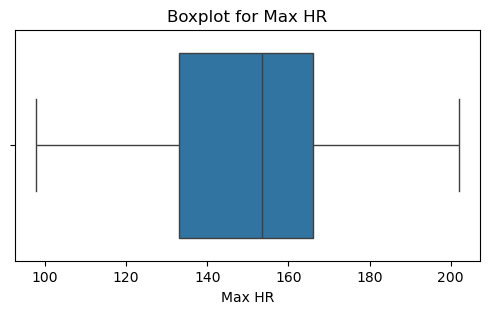

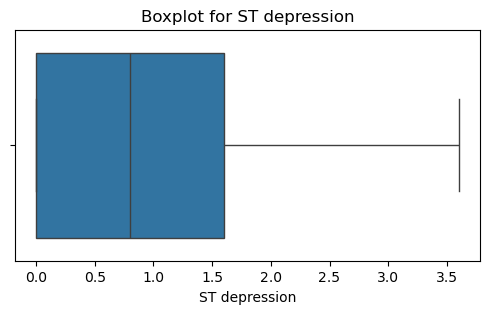

In [29]:
for i in cont_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

In [24]:
# No outliers found after clipping

### Select Dependent and Independent Features

In [31]:
df.head(2)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130.0,322.00,0,2,109.0,0,2.4,2,3,3,Presence
1,67,0,3,115.0,340.93,0,2,160.0,0,1.6,2,0,7,Absence


In [33]:
x = df.drop('Heart Disease',axis=1)   # independent features
y = df['Heart Disease']               # dependent feature
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(270, 13)
(270,)


### Splitting into Test and Train Data

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(202, 13)
(68, 13)
(202,)
(68,)


### Create a function to compute Confusion Matrix and Classification report

In [39]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [41]:
def eval_model(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

In [43]:
def model_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    train_scr = model.score(x_train,y_train)
    test_scr = model.score(x_test,y_test)
    print('Traiining Score', train_scr)
    print('test Score', test_scr)
    ypred = model.predict(x_test)
    #print('Predictions\n',ypred)
    eval_model(y_test,ypred)
    res = {'Train_Score':train_scr,'Test_Score':test_scr}
    return res

### Model Building

#### 1) Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [47]:
log_reg = LogisticRegression(max_iter=1000)
log_reg_res = model_metrics(log_reg,x_train,x_test,y_train,y_test)

Traiining Score 0.8415841584158416
test Score 0.8529411764705882
Confusion Matrix
 [[36  4]
 [ 6 22]]
Classification Report
               precision    recall  f1-score   support

     Absence       0.86      0.90      0.88        40
    Presence       0.85      0.79      0.81        28

    accuracy                           0.85        68
   macro avg       0.85      0.84      0.85        68
weighted avg       0.85      0.85      0.85        68



In [49]:
model1 = pd.DataFrame(log_reg_res,index=['Logistic Regression'])
model1

,Train_Score,Test_Score
Logistic Regression,0.841584,0.852941


#### 2) Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [53]:
d_tree = DecisionTreeClassifier(random_state=42)
d_tree_res = model_metrics(d_tree,x_train,x_test,y_train,y_test)

Traiining Score 1.0
test Score 0.75
Confusion Matrix
 [[31  9]
 [ 8 20]]
Classification Report
               precision    recall  f1-score   support

     Absence       0.79      0.78      0.78        40
    Presence       0.69      0.71      0.70        28

    accuracy                           0.75        68
   macro avg       0.74      0.74      0.74        68
weighted avg       0.75      0.75      0.75        68



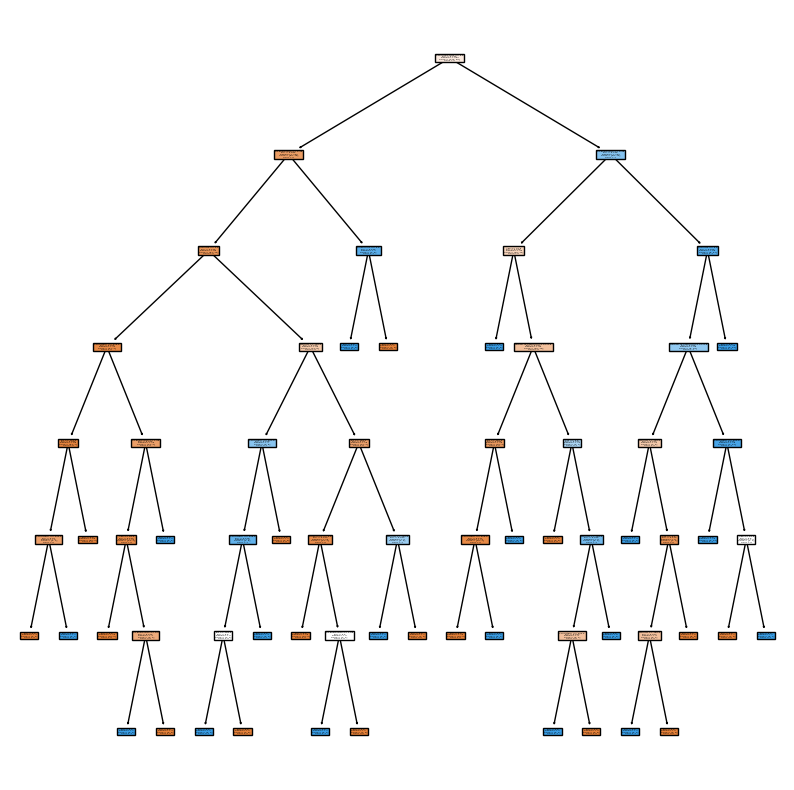

In [39]:
plt.figure(figsize=(10,10))
plot_tree(d_tree,feature_names=x_train.columns,class_names=['0','1'],filled=True)
plt.show()

In [55]:
model2 = pd.DataFrame(d_tree_res,index=['Decision Tree'])
model2

,Train_Score,Test_Score
Decision Tree,1.0,0.75


In [57]:
from sklearn.model_selection import KFold

In [59]:
kf = KFold(n_splits=10)

#### 3) Decision Tree with HyperParameter Tuning using GridSearchCV

In [61]:
from sklearn.model_selection import GridSearchCV

In [63]:
hparams_dt = {'criterion':['gini','entropy'],
             'max_depth':list(range(4,16)),
             'min_samples_split':list(range(8,30))}

In [65]:
dt_model = DecisionTreeClassifier()
gs1 = GridSearchCV(estimator=dt_model,param_grid=hparams_dt,cv=kf,scoring='accuracy')
gs1.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15],
                         'min_samples_split': [8, 9, 10, 11, 12, 13, 14, 15, 16,
                                               17, 18, 19, 20, 21, 22, 23, 24,
                                               25, 26, 27, 28, 29]},
             scoring='accuracy')

In [67]:
print('Best HyperParameters')
print(gs1.best_params_)
print(gs1.best_estimator_)

Best HyperParameters
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 8}
DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=8)


In [69]:
d_tree_gs = DecisionTreeClassifier(**gs1.best_params_)
d_tree_gs_res = model_metrics(d_tree_gs,x_train,x_test,y_train,y_test)

Traiining Score 0.9702970297029703
test Score 0.7647058823529411
Confusion Matrix
 [[34  6]
 [10 18]]
Classification Report
               precision    recall  f1-score   support

     Absence       0.77      0.85      0.81        40
    Presence       0.75      0.64      0.69        28

    accuracy                           0.76        68
   macro avg       0.76      0.75      0.75        68
weighted avg       0.76      0.76      0.76        68



In [71]:
model3 = pd.DataFrame(d_tree_gs_res,index=['Decision Tree with GridSearchCV'])
model3

,Train_Score,Test_Score
Decision Tree with GridSearchCV,0.970297,0.764706


#### 4) Random Forest with GridSearchCV

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
hparams_rf = {'n_estimators':[50,100,150,200],
             'criterion':['gini','entropy'],
             'max_depth':list(range(4,10)),
             'min_samples_split':[10,12,14,16,18,20,22,24]}

In [77]:
rf = RandomForestClassifier()
gs2 = GridSearchCV(estimator=rf,param_grid=hparams_rf,cv=5,scoring='accuracy')
gs2.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9],
                         'min_samples_split': [10, 12, 14, 16, 18, 20, 22, 24],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [79]:
print('Best HyperParameters')
print(gs2.best_params_)
print(gs2.best_estimator_)

Best HyperParameters
{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 14, 'n_estimators': 100}
RandomForestClassifier(max_depth=4, min_samples_split=14)


In [81]:
rf_gs = RandomForestClassifier(**gs2.best_params_)
rf_gs_res = model_metrics(rf_gs,x_train,x_test,y_train,y_test)

Traiining Score 0.9207920792079208
test Score 0.8382352941176471
Confusion Matrix
 [[37  3]
 [ 8 20]]
Classification Report
               precision    recall  f1-score   support

     Absence       0.82      0.93      0.87        40
    Presence       0.87      0.71      0.78        28

    accuracy                           0.84        68
   macro avg       0.85      0.82      0.83        68
weighted avg       0.84      0.84      0.84        68



In [83]:
model4 = pd.DataFrame(rf_gs_res,index=['Random Forest with GridSearchCV'])
model4

,Train_Score,Test_Score
Random Forest with GridSearchCV,0.920792,0.838235


#### 5) KNN 

In [85]:
from sklearn.neighbors import KNeighborsClassifier

* <b>Scaling the data<b>

In [87]:
from sklearn.preprocessing import StandardScaler

In [89]:
sc = StandardScaler()
sc.fit(x_train)

x_train_sc = sc.transform(x_train)
x_test_sc = sc.transform(x_test)

* <b>Finding optimal number of neighbors<b>

In [91]:
hparams_knn = {'n_neighbors':list(range(3,21,2))}

In [93]:
knn = KNeighborsClassifier()
gs3 = GridSearchCV(estimator=knn,param_grid=hparams_knn,cv=kf,scoring='accuracy')
gs3.fit(x_train_sc,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19]},
             scoring='accuracy')

In [95]:
print('Best HyperParameters')
print(gs3.best_params_)
print(gs3.best_estimator_)

Best HyperParameters
{'n_neighbors': 13}
KNeighborsClassifier(n_neighbors=13)


In [97]:
knn_gs = KNeighborsClassifier(**gs3.best_params_)
knn_gs_res = model_metrics(knn_gs,x_train_sc,x_test_sc,y_train,y_test)

Traiining Score 0.8366336633663366
test Score 0.8676470588235294
Confusion Matrix
 [[38  2]
 [ 7 21]]
Classification Report
               precision    recall  f1-score   support

     Absence       0.84      0.95      0.89        40
    Presence       0.91      0.75      0.82        28

    accuracy                           0.87        68
   macro avg       0.88      0.85      0.86        68
weighted avg       0.87      0.87      0.87        68



In [99]:
model5 = pd.DataFrame(knn_gs_res,index=['KNN with GridSearchCV'])
model5

,Train_Score,Test_Score
KNN with GridSearchCV,0.836634,0.867647


#### 6) SVM (Support Vector Machine) with GridSearchCV

In [101]:
from sklearn.svm import SVC

* <b>Scaling the data<b>

Data is already scaled in the previous model (x_train_sc,x_test_sc)

In [103]:
hparams_svm = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf', 'poly','sigmoid']}

In [105]:
svm = SVC()
gs4 = GridSearchCV(estimator=svm,param_grid=hparams_svm,cv=kf,scoring='accuracy')
gs4.fit(x_train_sc,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [107]:
print('Best HyperParameters')
print(gs4.best_params_)
print(gs4.best_estimator_)

Best HyperParameters
{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
SVC(C=1, gamma=0.01, kernel='linear')


In [109]:
svm_gs = SVC(**gs4.best_params_)
svm_gs_res = model_metrics(svm_gs,x_train_sc,x_test_sc,y_train,y_test)

Traiining Score 0.8613861386138614
test Score 0.8676470588235294
Confusion Matrix
 [[35  5]
 [ 4 24]]
Classification Report
               precision    recall  f1-score   support

     Absence       0.90      0.88      0.89        40
    Presence       0.83      0.86      0.84        28

    accuracy                           0.87        68
   macro avg       0.86      0.87      0.86        68
weighted avg       0.87      0.87      0.87        68



In [111]:
model6 = pd.DataFrame(svm_gs_res,index=['SVM with GridSearchCV'])
model6

,Train_Score,Test_Score
SVM with GridSearchCV,0.861386,0.867647


### Result of all the Models

In [113]:
result = pd.concat([model1,model2,model3,model4,model5,model6])
result

,Train_Score,Test_Score
Logistic Regression,0.841584,0.852941
Decision Tree,1.000000,0.750000
Decision Tree with GridSearchCV,0.970297,0.764706
Random Forest with GridSearchCV,0.920792,0.838235
KNN with GridSearchCV,0.836634,0.867647
SVM with GridSearchCV,0.861386,0.867647
